<a href="https://colab.research.google.com/github/ROYMASON11v1/CompuBlanda/blob/main/Previa1_Blanda_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Compu. Blanda
- Cristian Rodriguez 
- Nicolas Amaya 
- Victor Betancourth

#Redes neuronales

##Parte1

###Red neural nivel 0 "Programación completa"

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

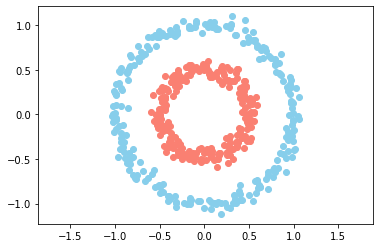

In [ ]:
#Crear el dataset

n=500 #Cantidad
p=2 #Caracteristicas

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

#plt.scatter(X[:, 0], X[:,1])

plt.scatter(X[Y[:, 0]==0, 0], X[Y[:, 0]==0, 1], c="skyblue")
plt.scatter(X[Y[:, 0]==1, 0], X[Y[:, 0]==1, 1], c="salmon")
plt.axis("equal")
plt.show()

ver las capas como modulos

In [ ]:
#Clase de la capa de la red
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)*2 -1 #bias
    self.W = np.random.rand(n_conn, n_neur)*2 -1 

Las funciones son la funcion por la cual se pasa la suma ponderada que se pasa por la neurona y que va a introducir en nuestra red neural no linealidades que basicamente nos va a permitir combinar muchas neuronas
El número de entradas se distorsiona en un rango entre 0 1

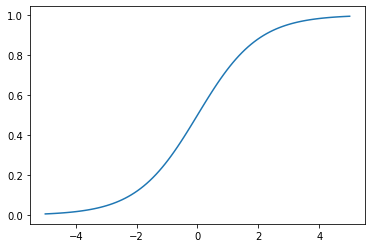

In [ ]:
#funciones de activación

sigm = (lambda x: 1/(1+ np.e**(-x)),
        lambda x: x*(1-x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigm[0](_x))

In [ ]:
# l0 = neural_layer(p, 4, sigm) #layer cero 
# l1 = neural_layer(4, 8, sigm) #layer uno
# . . .

#Pueden haber mas hiper parametros como learning rate y que tipo de funcion de activacion a usar

def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

Paso para el entrenamiento: Elementos fundamentales:

1- paso hacia adelante 

2- una vez que se tiene el resultado se compara el resultado mediante la funcion de coste y erificar el error. el error lo vamos a usar para realizar una propagación hacia atras para obtener calcular las derivadas parciales

3- Decenso del gradiente: permite optimizar la funcion de coste

In [ ]:
topology = [p, 4, 8, 1] #elegidos de manera arbitraria

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr)**2), #Error cuadrático medio
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  #Forward pass
  #Coger nuestro vector de entrada y pasarlo capa por capa ejecutando pues la operaciones que se realiza en cada una de las neuronas (suma ponderada)

  out = [(None, X)]

  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #Suma ponderada
    a = neural_net[l].act_f[0](z) #

    out.append((z, a))
  
  print(l2_cost[0](out[-1][1], Y))

  if train:
    #Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z= out[l+1][0]
      a= out[l+1][1]

      print(a.shape)

      if l == len(neural_net) -1:
        #calcular delta ultima capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        #Calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
      
      _W = neural_net[l].W

      #Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0] axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)
print("")

0.25048552556826936
(500, 1)
(500, 8)
(500, 4)



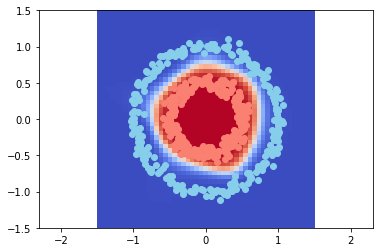

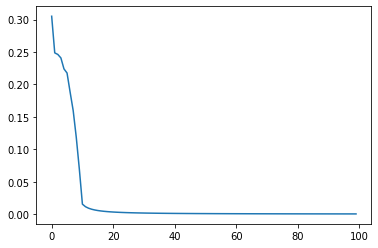

0.00034707761183997186
(500, 1)
(500, 8)
(500, 4)
0.0003469086901134722
(500, 1)
(500, 8)
(500, 4)
0.0003467399267226831
(500, 1)
(500, 8)
(500, 4)
0.0003465713214490721
(500, 1)
(500, 8)
(500, 4)
0.0003464028740745035
(500, 1)
(500, 8)
(500, 4)
0.00034623458438123877
(500, 1)
(500, 8)
(500, 4)
0.00034606645215193386
(500, 1)
(500, 8)
(500, 4)
0.0003458984771696395
(500, 1)
(500, 8)
(500, 4)
0.0003457306592178012
(500, 1)
(500, 8)
(500, 4)
0.00034556299808025483
(500, 1)
(500, 8)
(500, 4)
0.0003453954935412308
(500, 1)
(500, 8)
(500, 4)
0.0003452281453853488
(500, 1)
(500, 8)
(500, 4)
0.00034506095339761976
(500, 1)
(500, 8)
(500, 4)
0.0003448939173634425
(500, 1)
(500, 8)
(500, 4)
0.00034472703706860553
(500, 1)
(500, 8)
(500, 4)
0.0003445603122992843
(500, 1)
(500, 8)
(500, 4)
0.00034439374284204126
(500, 1)
(500, 8)
(500, 4)
0.00034422732848382386
(500, 1)
(500, 8)
(500, 4)
0.0003440610690119655
(500, 1)
(500, 8)
(500, 4)
0.0003438949642141827
(500, 1)
(500, 8)
(500, 4)
0.0003437290

In [ ]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = [] #

for i in range(2500):
  #entrenamos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:

    print(pY)

    loss.append(l2_cost[0](pY, Y))

    res = 50 #resolucion

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False) [0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
    plt.axis("equal")

    plt.scatter(X[Y[:, 0]==0, 0], X[Y[:, 0]==0, 1], c="skyblue")
    plt.scatter(X[Y[:, 0]==1, 0], X[Y[:, 0]==1, 1], c="salmon")

    clear_output(wait= True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)


##Parte 2

###Datos iniciales

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

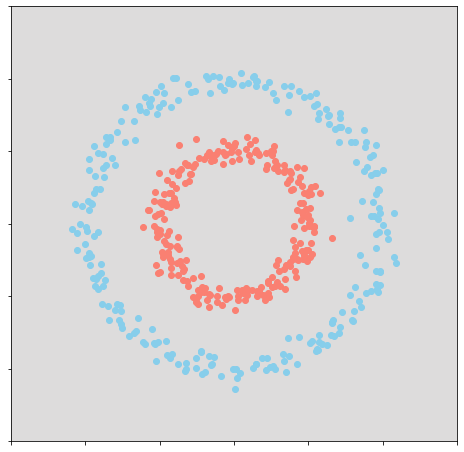

In [ ]:
#Creamos nuestros datos artificales, donde buscaremos clasificar dos anillos concentricos de datos
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

#Resolución del mapa de predicción
res = 100

#coordenadas del mapa de predicción
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

#imput con cada combo de coordenadas del mapa de predicción
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

#Objeto vacio a 0.5 del mapa de predicción
_pY = np.zeros((res, res)) + 0.5

#Visualización del mapa de predicción
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0, _x1, _pY, cmap='coolwarm', vmin=0, vmax=1)

#Visualización de la nube de datos
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

###Red neural nivel 1 "Diferenciación automática"

TensorFlow

In [ ]:
from matplotlib import animation
from IPython.core.display import display, HTML

# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 2500 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)

Step 0 / 2500 - Loss =  0.41648087 - Acc = 0.548
Step 25 / 2500 - Loss =  0.38179523 - Acc = 0.596
Step 50 / 2500 - Loss =  0.35535988 - Acc = 0.618
Step 75 / 2500 - Loss =  0.33358774 - Acc = 0.65
Step 100 / 2500 - Loss =  0.32564673 - Acc = 0.666
Step 125 / 2500 - Loss =  0.32118243 - Acc = 0.676
Step 150 / 2500 - Loss =  0.3180022 - Acc = 0.678
Step 175 / 2500 - Loss =  0.31503275 - Acc = 0.682
Step 200 / 2500 - Loss =  0.31192556 - Acc = 0.684
Step 225 / 2500 - Loss =  0.30806938 - Acc = 0.696
Step 250 / 2500 - Loss =  0.30390635 - Acc = 0.698
Step 275 / 2500 - Loss =  0.2987521 - Acc = 0.698
Step 300 / 2500 - Loss =  0.2928246 - Acc = 0.706
Step 325 / 2500 - Loss =  0.2858112 - Acc = 0.71
Step 350 / 2500 - Loss =  0.2759397 - Acc = 0.714
Step 375 / 2500 - Loss =  0.23637839 - Acc = 0.75
Step 400 / 2500 - Loss =  0.18287185 - Acc = 0.818
Step 425 / 2500 - Loss =  0.10892547 - Acc = 0.882
Step 450 / 2500 - Loss =  0.04210196 - Acc = 0.978
Step 475 / 2500 - Loss =  0.024880266 - Acc 

--- Generando animación ---


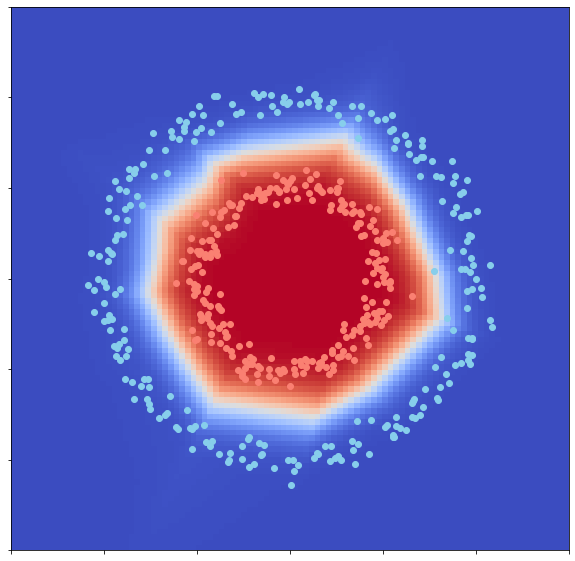

In [ ]:
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

#Gracias